# Charakteristika großer Netze
Große Graphen, die reale Sachverhalte, wie beispielsweise soziale oder biologische Netzwerke abbilden, können häufig durch verschiedene strukturelle Eigenschaften und statistische Merkmale charakterisiert werden. Zwei wichtige Konzepte zur Charakterisierung sind die Power-Law-Verteilung und die Small-World-Eigenschaften.

In [ ]:
import networkx as nx

## Inhaltsverzeichnis
- [Skalenfreie Netzwerke](#Skalenfreie-Netzwerke)
- [Bestimmung des Power-Law-Exponenten](#Bestimmung-des-Power-Law-Exponenten)
- [Small-World-Graphen](#Small-World-Graphen)

## Skalenfreie Netzwerke
Viele reale Netzwerke sind skalenfreie Netzwerke. Das bedeutet, dass der Grad der Knoten der Power-Law-Verteilung folgt.

### Power-Law-Verteilung
Die Power-Law-Verteilung, übersetzbar zu Potenzverteilung, ist eine Art statistische Verteilung, bei der die Wahrscheinlichkeit eines Ereignisses $P(x)$ proportional zu einer Potenz $x^{-\alpha}$ ist. $\alpha$ ist dabei ein positiver Parameter, der als Skalenfaktor bezeichnet wird. Hinzu kommt ggf. eine Konstante $C \in \mathbb{R}$, die allerdings die Form der Verteilung nicht beeinflusst:

$$ p(x) = C * x^{-\alpha} \text{ für } \alpha > 1 \text{ und } x \geq x_{min} $$

Diese Verteilung ist dadurch charakterisiert, dass wenige Ereignisse eine sehr hohe Wahrscheinlichkeit und viele Ereignisse eine sehr geringe Wahrscheinlichkeit besitzen.

<center>
    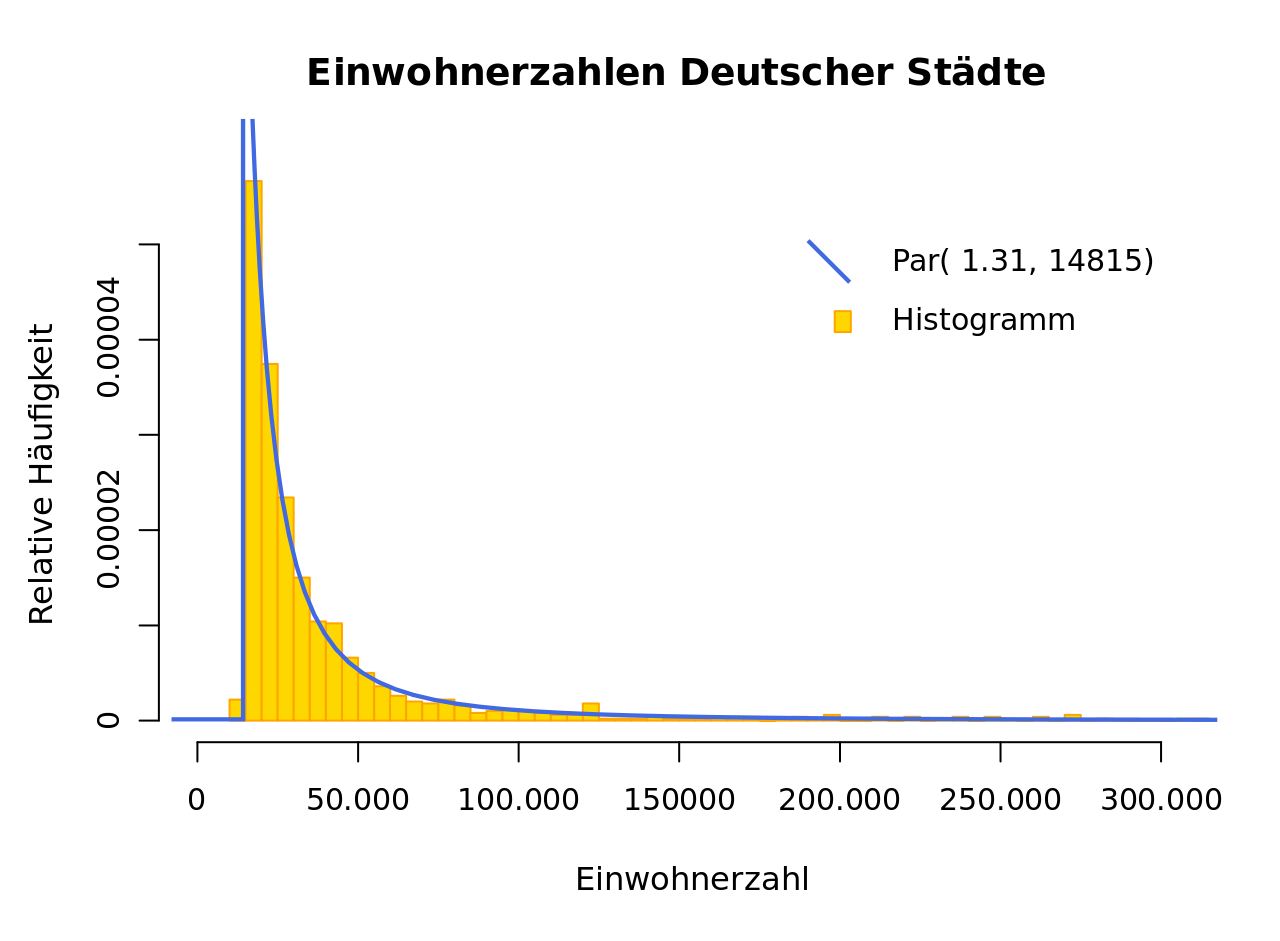
</center>

Die Einwohnerzahlen deutscher Städte können ungefähr durch die Verteilung $380969 * x^{-3,31}$ dargestellt werden. Es gibt somit sehr viele Gemeinden mit relativ wenigen Einwohnern und vergleichsweise wenige Großstädte. Ähnliche Verteilungen lassen sich sich auch beim Jahreseinkommen, der Worthäufigkeit innerhalb vieler Texte oder auch Buchverkäufen beobachten.

## Bestimmung des Power-Law-Exponenten
Der Nachweis einer Power-Law-Verteilung erfordert die Bestimmung des Exponenten $\alpha$, wofür nachfolgend zwei Möglichkeiten umrissen werden. Bei der Rekonstruktion der Parameter muss allerdings zwingend darauf geachtet werden, dass die untere Grenze $x_{min}$ berücksichtigt wird.

### Graphische Methode
Zuerst werden beide Seiten durch die Logarithmusfunktion linearisiert:

$$ log(y) = log(C * x^{-\alpha}) = log(C) - \alpha * log(x) $$

Folgt die Verteilung einer Potenzfunktion ist in der grafischen log-log-Darstellung nun eine annähernde Gerade zu erkennen:

<center>
    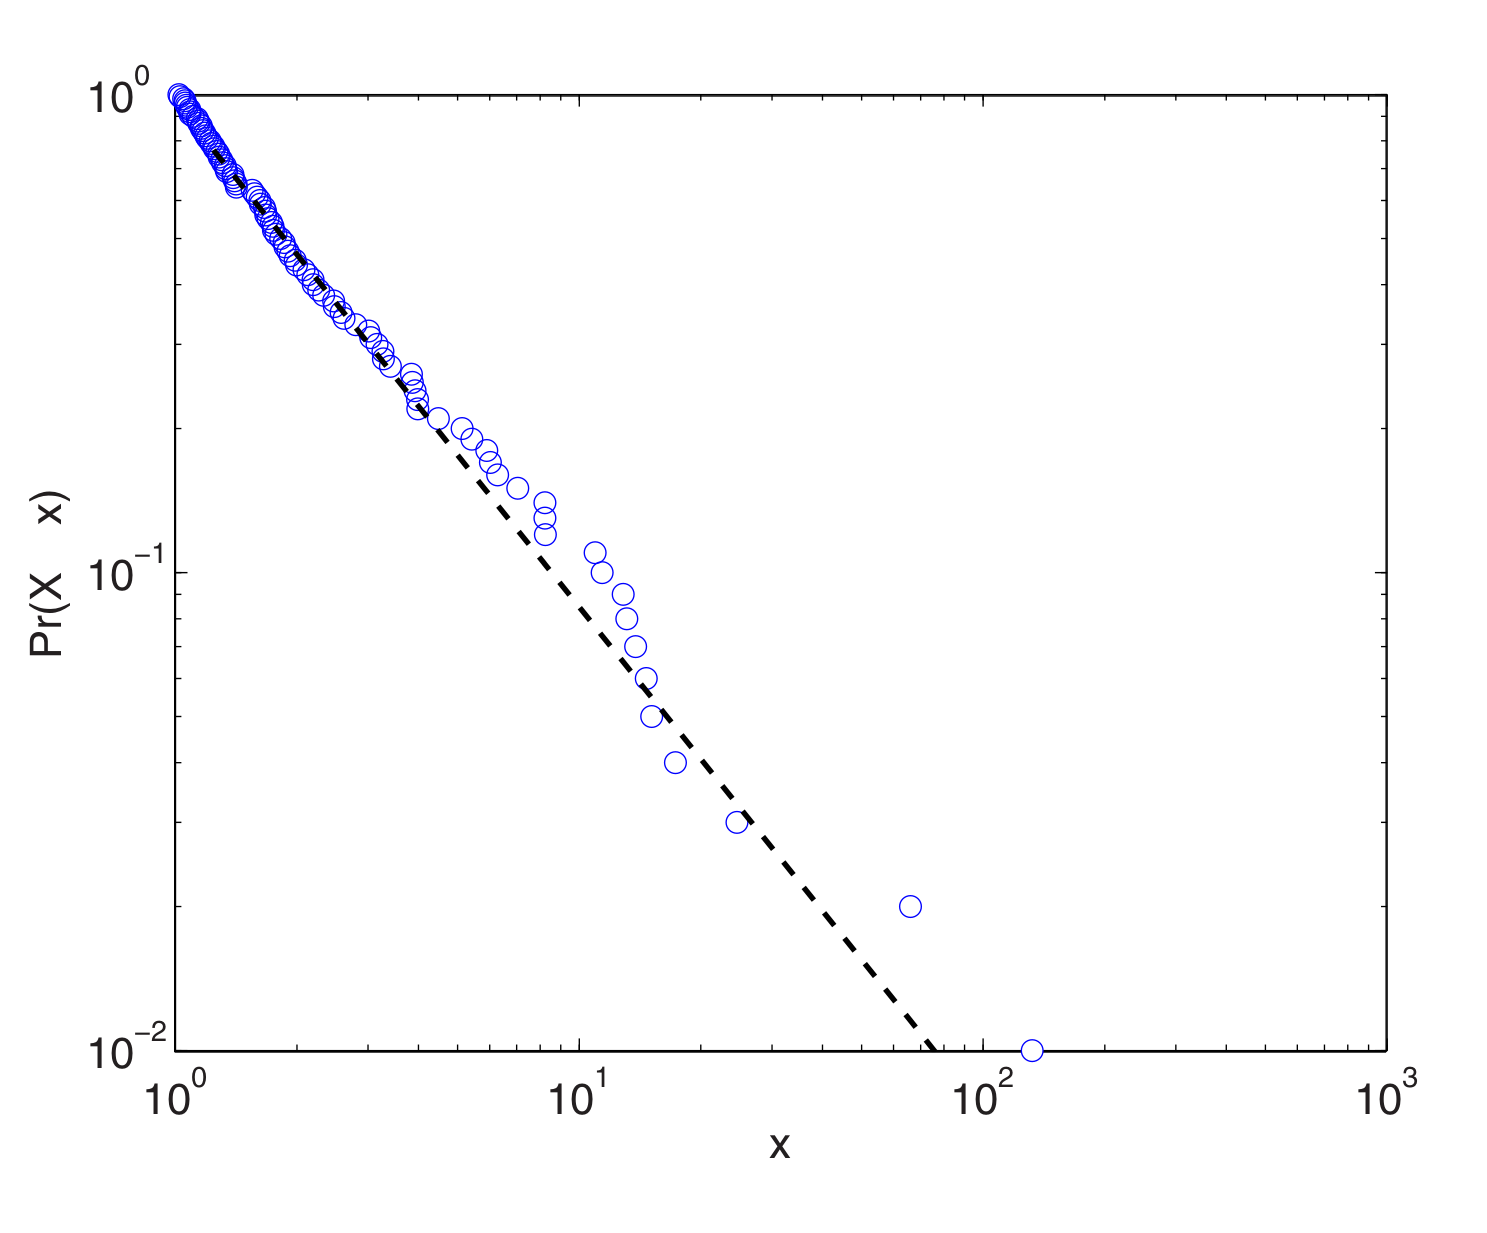
</center>

Der Parameter Paramter $\alpha$ kann dann durch lineare Regression geschätzt werden.

### Maximum-Likelihood-Schätzung
Mit Hilfe einer Maximum-Likelihood-Schätzung kann der Parameter $\alpha$ ebenfalls geschätzt werden. Wir nehmen dafür an, dass die Daten einer Power-Law-Verteilung folgen. Dann ergibt sich aus der Likelihood-Funktion ein Schätzer für $\alpha$:

$$ \hat{a} = 1 + n * \left(\sum_{i=1}^{n} log\left(\frac{x_i}{x_{min}}\right)\right)^{-1} $$

Das Problem bleibt die Bestimmung von $x_min$, da mit steigendem Wert mehr Werte entfernt werden und somit somit die Schätzung scheinbar besser wird.

## Small-World-Graphen
Small World Graphen sind eine spezielle Klasse von Graphen, die sich eine bestimmte Eigenschaft teilen. Die Idee entstammt dem bereits 1967 von Stanley Milgram (bekannt für das Milgram Experiment) geprägtem Kleine-Welt-Phänomen und beschreibt einen eigentlich sozialpsychologischen Sachverhalt, der aber auch in die Mathematik Einzug gefunden hat: 60 zufällige gewählte Personen aus Omaha (Nebraska) und Wichita (Kansas) sollten einer vorher festgelegten Person in Boston (Massachusetts) ein Paket zusenden. Wenn sie die Zielperson nicht (durch Zufall) persönlich kannten, sollten sie einen ihrer persönlichen Bekannten auswählen, bei dem die Wahrscheinlichkeit höher ist, dass dieser die Zielperson kennt, und zunächst diesem das Paket zusenden.

<center>
     <br>
    Nebraska (blau), Kansas (blau) und Massachusetts (rot)
</center>

Auch wenn dieser Versuch nicht ohne Kritik blieb, da unter anderem lediglich drei der $60$ Pakete ihr Ziel erreichten, war die Pfadlänge mit durchschnittlich $5,5$ überraschend niedrig. Eine mögliche Schlussfolgerung wäre demnach, dass jeder Einwohner der Vereinigten Staaten jeden anderen über durchschnittlich sechs Personen *kennt*.

Weitere Versuche blieben natürlich nicht aus und so konnte schließlich [im Auftrag Microsofts](http://erichorvitz.com/leskovec_horvitz_www2008.pdf) mit $30$ Milliarden Nachrichten und $240$ Millionen beteiligten Personen innerhalb des Microsoft Messengers der bis dahin größte Graph eines sozialen Netzwerks mit $180$ Millionen Knoten und $1,3$ Milliarden Kanten konstruiert und analysiert werden. Die durchschnittliche Pfadlänge wurde mit $6,6$ und somit nur knapp über der durch Milgram ermittelten Länge bestimmt.

### Small-World-Modell
Das Small-World-Modell von Watts und Strogatz aus dem Jahr 1998 ist ein mathematisches Modell, das die Eigenschaften von Small-World-Netzwerken beschreibt. Sie gehen dabei insbesondere von zwei essentiellen Eigenschaften aus:
- Die durchschnittliche Pfadlänge ist relativ klein.
- Der Clustering-Koeffizient ist relativ groß. (Die Wahrscheinlichkeit, dass zwei miteinander in Verbindung stehende Personen beide mit einer dritten verbunden sind, ist hoch.)

Um die Eigenschaften eines solchen Netzwerks zu simulieren, beschrieben sie außerdem einen einfachen Mechanismus:
1. Aus $N$ Knoten wird ein **regulärer Ring** erzeugt, bei dem jeder Knoten mit seinen $k$ nächsten Nachbarn verbunden ist. (Ist $k$ gerade, sind diese Verbindungen symmetrisch. Für $k=4$ gilt beispielsweise, dass jeder Knoten zu jeweils zwei Nachbarn auf der linken und rechten Seite verbunden ist.)
2. Während der **Rewiring-Prozedur** werden die Kanten neu verbunden. Für jeden Knoten wird dazu die Kante zum nächsten Nachbarn betrachtet und mit einer Wahrscheinlichkeit $p$ durch eine Kante zu einem zufälligen Knoten ausgetauscht ohne doppelte Kanten zu erzeugen. Im nächsten Durchlauf wird dann mit der Kante zum zweitnächsten Nachbarn fortgefahren. Insgesamt werden $\frac{k}{2}$ Runden durchgeführt.

Über den Parameter $p$ lässt sich somit die *Zufälligkeit* des Netzwerks einstellen. Für $p=0$ bleibt der Graph ein regulärer Ring, während er für $p=1$ vollständig zufällig wird. Für $p \in (0, 1)$ entsteht ein Small-World-Graph. (In dieser Implementierung ist allerdings nicht garantiert, dass der Graph vollständig verbunden bleibt!)

<center>
    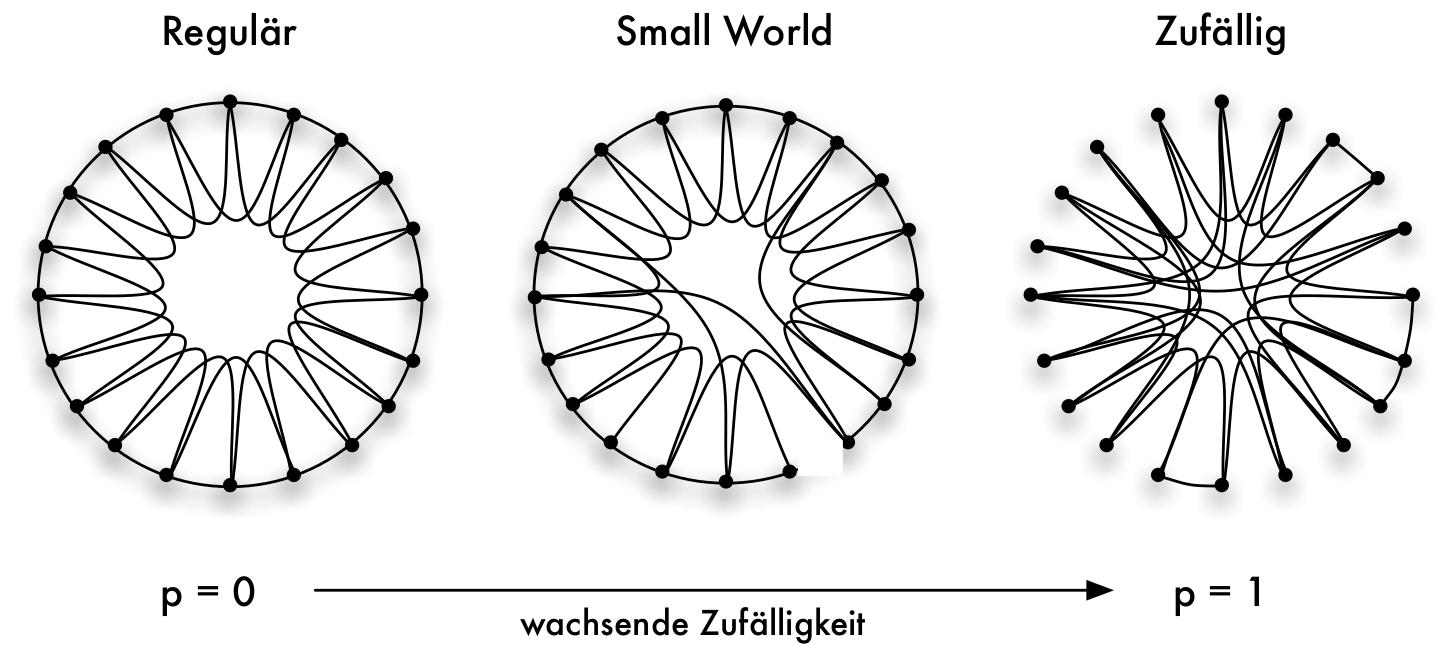
</center>

Mit einem steigenden Werte für $p$ sinkt sowohl die durchschnittliche Pfadlänge als auch der Clustering-Koeffizient.

<center>
    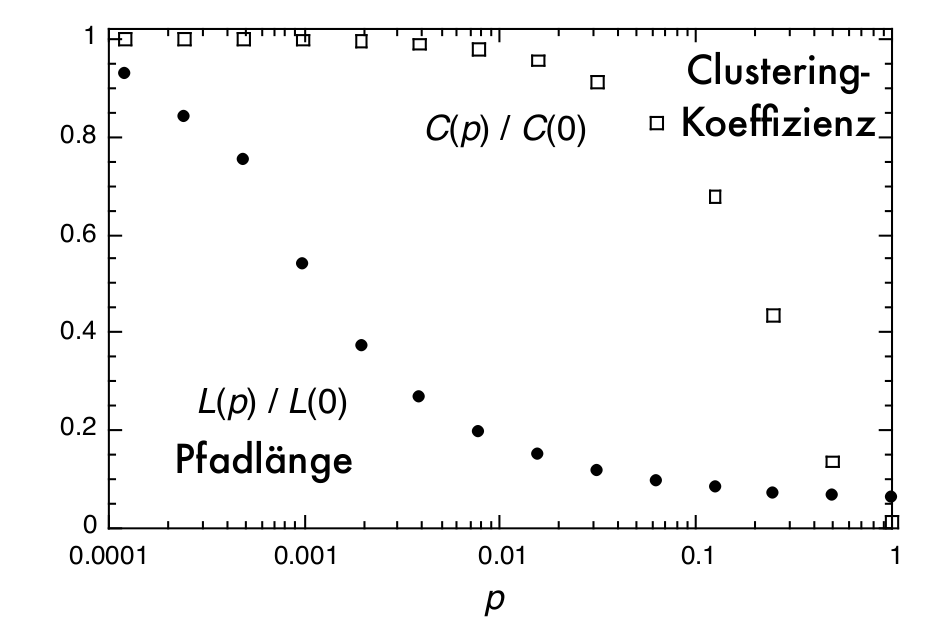
</center>

Darüber hinaus liefert NetworkX eine integrierte Funktion, um Watts-Strogatz-Graphen zu erzeugen. Die Parameter $N$, $k$ und $p$ können Sie dabei nach Wunsch anpassen.

In [ ]:
wsg = nx.watts_strogatz_graph(n=10, k=4, p=0.4)
nx.draw_circular(wsg)